In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/TamilNadu1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,23,23.942629,949.792664,95.038603,109.027520,0
131396,2014,12,31,20,0,0,0,0,0,0,0,22,23.816937,950.480530,95.051303,122.815953,0
131397,2014,12,31,21,0,0,0,0,0,0,0,22,23.651271,950.498596,95.063357,136.493751,0
131398,2014,12,31,22,0,0,0,0,0,0,0,22,23.463472,950.312073,94.849659,149.723659,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,16,18.991073,951.739258,88.086527,105.737471,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,16,19.082109,952.528564,86.906296,92.034323,0,2000-01-01 06:00:00
7,2000,1,1,7,0,78,302,138,71,355,141,17,20.282244,953.285584,81.499087,78.560168,0,2000-01-01 07:00:00
8,2000,1,1,8,0,147,468,341,117,611,370,17,22.268241,953.526489,73.018861,65.523141,0,2000-01-01 08:00:00
9,2000,1,1,9,0,184,587,535,143,737,584,17,23.986125,953.256287,66.480553,53.289244,0,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,563.3
2000-01-02,588.0
2000-01-03,325.7
2000-01-04,573.9
2000-01-05,572.7
...,...
2014-12-27,428.9
2014-12-28,447.0
2014-12-29,516.3


In [8]:
X

,Date,GHI
0,2000-01-01 08:00:00,341
1,2000-01-01 09:00:00,535
2,2000-01-01 10:00:00,692
3,2000-01-01 11:00:00,851
4,2000-01-01 12:00:00,860
...,...,...
54745,2014-12-31 13:00:00,154
54746,2014-12-31 14:00:00,147
54747,2014-12-31 15:00:00,141
54748,2014-12-31 16:00:00,62


In [9]:
y[:4380]

,GHI
Date,
2000-01-01,563.3
2000-01-02,588.0
2000-01-03,325.7
2000-01-04,573.9
2000-01-05,572.7
...,...
2011-12-27,446.2
2011-12-28,520.9
2011-12-29,525.3


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
type(y)

pandas.core.frame.DataFrame

In [12]:
X_T=[]
X=X.loc[:,'GHI']
X=X.values

for i in range(0,54750,10):
  X_add = X[i:i+10]
  #print(i,j)
  X_T.append(X_add)
  
X_T=np.asarray(X_T)
X_T.shape

(5475, 10)

In [13]:
X_T

array([[341, 535, 692, ..., 425, 314,  74],
       [366, 585, 753, ..., 536, 313,  87],
       [268, 301, 406, ..., 266, 104,  17],
       ...,
       [344, 548, 707, ..., 368, 146,  64],
       [307, 487, 514, ..., 124, 247,  56],
       [342, 547, 709, ..., 141,  62,  79]])

In [14]:
Y_T=y.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(5475,)

In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=10))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
  
# fit model
model.fit(X_T[:4380], Y_T[:4380], epochs=2000, verbose=0)


In [16]:
# demonstrate prediction
yhat=[]


for i in range(4380,5475):
  x_input = X_T[i]
  x_input = x_input.reshape(1,10)
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[592.0497]]
[[573.44806]]
[[594.5496]]
[[456.14755]]
[[501.3668]]
[[571.35455]]
[[582.0519]]
[[302.06802]]
[[493.55652]]
[[490.75793]]
[[424.85995]]
[[494.14114]]
[[587.448]]
[[600.3487]]
[[535.9452]]
[[621.24713]]
[[580.3484]]
[[625.0468]]
[[620.64716]]
[[610.14667]]
[[626.04663]]
[[611.94446]]
[[628.64655]]
[[635.3462]]
[[641.04596]]
[[635.3461]]
[[631.1463]]
[[613.34515]]
[[564.64386]]
[[626.84326]]
[[568.9545]]
[[623.344]]
[[570.8558]]
[[477.66745]]
[[556.35046]]
[[538.1566]]
[[462.46176]]
[[582.65845]]
[[557.94354]]
[[511.9434]]
[[394.47165]]
[[615.4493]]
[[600.8459]]
[[578.0464]]
[[658.6445]]
[[516.4392]]
[[630.54663]]
[[616.94867]]
[[659.345]]
[[673.3404]]
[[682.54315]]
[[681.2434]]
[[612.25635]]
[[638.1343]]
[[681.3436]]
[[674.1437]]
[[679.4434]]
[[675.2437]]
[[651.04443]]
[[629.8537]]
[[653.6462]]
[[638.54645]]
[[606.44574]]
[[544.5559]]
[[664.9448]]
[[631.8423]]
[[661.34393]]
[[621.65106]]
[[551.15137]]
[[619.45]]
[[524.17334]]
[[499.5533]]
[[563.0523]]
[[546.7629]]
[[611.75

[array([[592.0497]], dtype=float32),
 array([[573.44806]], dtype=float32),
 array([[594.5496]], dtype=float32),
 array([[456.14755]], dtype=float32),
 array([[501.3668]], dtype=float32),
 array([[571.35455]], dtype=float32),
 array([[582.0519]], dtype=float32),
 array([[302.06802]], dtype=float32),
 array([[493.55652]], dtype=float32),
 array([[490.75793]], dtype=float32),
 array([[424.85995]], dtype=float32),
 array([[494.14114]], dtype=float32),
 array([[587.448]], dtype=float32),
 array([[600.3487]], dtype=float32),
 array([[535.9452]], dtype=float32),
 array([[621.24713]], dtype=float32),
 array([[580.3484]], dtype=float32),
 array([[625.0468]], dtype=float32),
 array([[620.64716]], dtype=float32),
 array([[610.14667]], dtype=float32),
 array([[626.04663]], dtype=float32),
 array([[611.94446]], dtype=float32),
 array([[628.64655]], dtype=float32),
 array([[635.3462]], dtype=float32),
 array([[641.04596]], dtype=float32),
 array([[635.3461]], dtype=float32),
 array([[631.1463]], dty

In [17]:
len(yhat)

1095

In [18]:
y[4380:].index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=1095, freq=None)

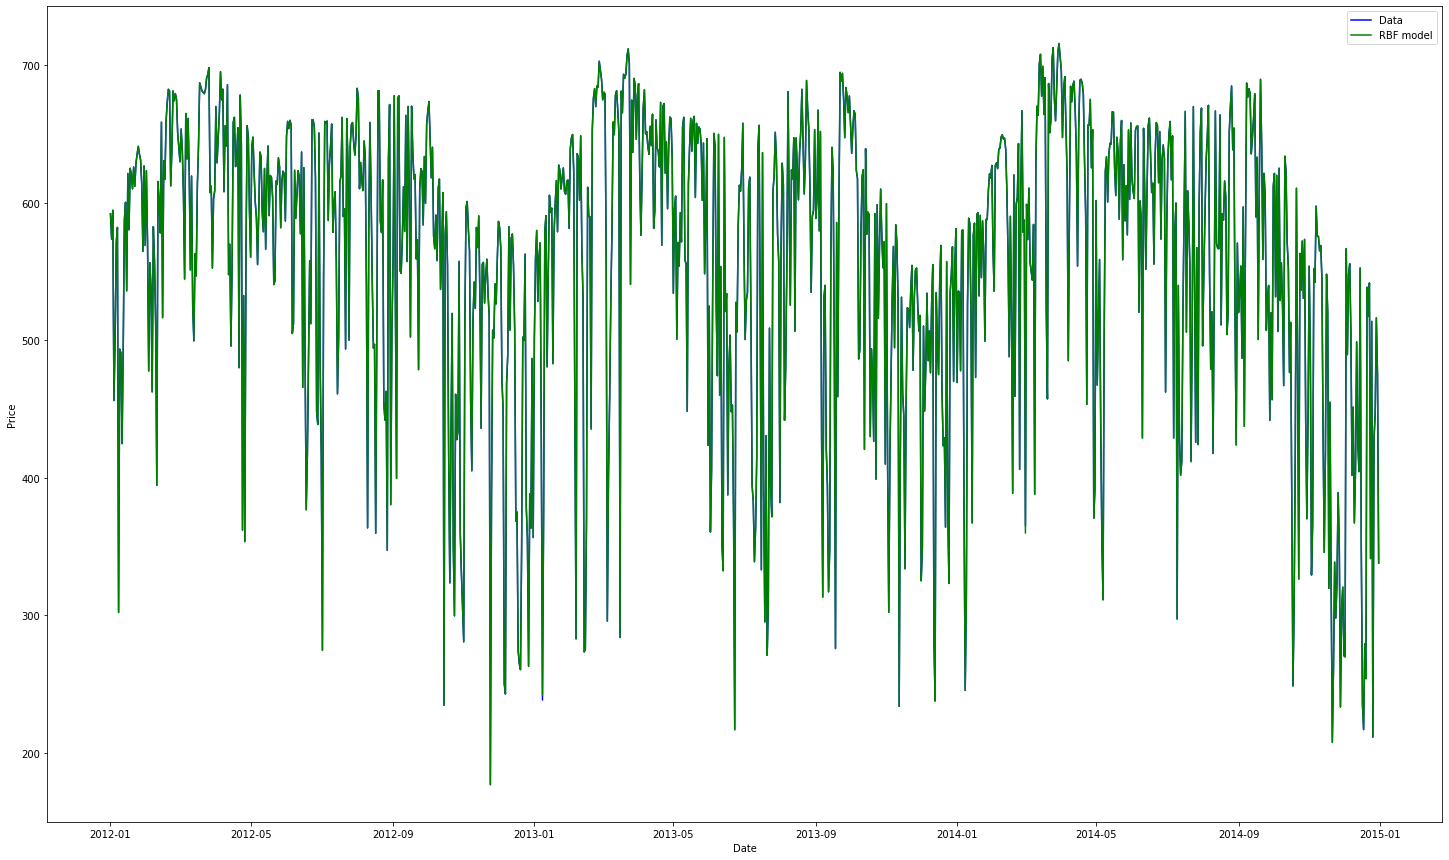

In [19]:
plt.figure(figsize = (25,15))
plt.plot(y[4380:].index, y[4380:], color= 'blue', label= 'Data')
plt.plot(y[4380:].index,np.asarray(yhat).reshape(1095,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
MLPdata = pd.DataFrame(columns=['Date','GHI'])
MLPdata['Date'] = y[4380:].index
MLPdata['GHI'] = np.asarray(yhat).reshape(1095,)
MLPdata.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/TamilNadu1/MLPdaily.csv')

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y[4380:],np.asarray(yhat).reshape(1095,) ,squared=False)

0.20276210720072838

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y[4380:],np.asarray(yhat).reshape(1095,))

0.00011832331201630979